# SEIRS+ Model Framework

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/computational-class/css/blob/master/notebooks/seirplus.ipynb)


UPDATE 7 Aug 2020: A new version of the seirsplus package featuring extended models, simulations, and other new features is being prepared for release in the coming days. In conjunction with this release, this readme is being transitioned to a more thorough wiki. Please bear with us during these updates, and check back shortly for more information.

This package implements generalized SEIRS infectious disease dynamics models with extensions that model the effect of factors including population structure, social distancing, testing, contact tracing, and quarantining detected cases.

Notably, this package includes stochastic implementations of these models on dynamic networks.

README Contents:

https://github.com/ryansmcgee/seirsplus

Models of SEIRS epidemic dynamics with extensions, including network-structured populations, testing, contact tracing, and social distancing.

In [2]:
pip install seirsplus

     |████████████████████████████████| 61 kB 4.5 kB/s eta 0:00:03
Note: you may need to restart the kernel to use updated packages.


t = 0.21
t = 10.33
[Checkpoint: Updating parameters]
t = 20.14
t = 30.03
t = 40.04
t = 50.18
t = 60.07
t = 70.03
t = 80.14
t = 90.17
[Checkpoint: Updating parameters]
t = 100.04
t = 110.07
t = 120.04
t = 130.00
t = 140.09
t = 150.01
t = 160.02
t = 170.02
t = 180.01
t = 190.06
t = 200.03
t = 210.02
t = 220.04
t = 230.00
t = 240.00
t = 250.01
t = 260.08
t = 270.02
t = 280.04
t = 290.00
t = 300.02


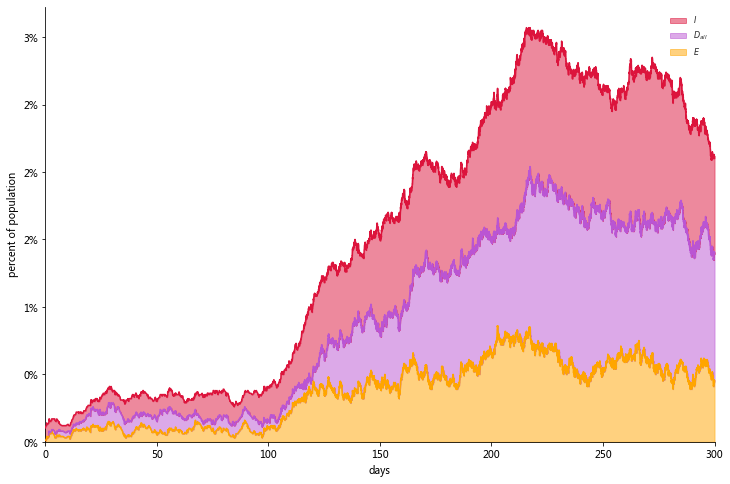

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x151e948e90>)

In [3]:
from seirsplus.models import *
import networkx

numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)
G_normal     = custom_exponential_graph(baseGraph, scale=100)
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)

model = SEIRSNetworkModel(G=G_normal, beta=0.155, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0.02, theta_I=0.02, phi_E=0.2, phi_I=0.2, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=10)

checkpoints = {'t': [20, 100], 'G': [G_distancing, G_normal], 'p': [0.1, 0.5], 'theta_E': [0.02, 0.02], 'theta_I': [0.02, 0.02], 'phi_E':   [0.2, 0.2], 'phi_I':   [0.2, 0.2]}

model.run(T=300, checkpoints=checkpoints)

model.figure_infections()